<a href="https://colab.research.google.com/github/t36yang/GlassDoorReviewAnalayis-Bank/blob/main/Bigram_of_Phase_5_Project_JupyterNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyLDAvis

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# preprocessing
import re
import string
import itertools # for flattening
# nltk library
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer as wn
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
nltk.download('punkt', quiet=True)
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# sklearn library
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [3]:
import gensim
from gensim import models, interfaces, utils
from gensim.models import Nmf

In [4]:
data=pd.read_csv('/content/sample_data/dice_com-job_us_sample.csv')

In [5]:
data.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


In [6]:
data.shape

(22000, 12)

In [7]:
data.jobdescription.loc[3000]

'Datanomics, a full service provider of computer consulting services since 1982, is currently seeking a Executive Level Unix Administratorfor a contract position with our client in New York City. No relocations ! Trading Floor Experience Needed !SEND your resume to Resumes@datanomics.com Please contact Lisa Conord at 908-707-8200 ext. 227,after sending your resume. Required Skills: Unix Operating Systems, Solaris 10/11, RedHat 6/7 Desired Skills:* Senior level experience with Unix operating systems (Solaris 10/11, RedHat 6/7), application and hardware provisioning/maintenance.* Manage UNIX and red hat environment, deploy, patch, and troubleshoot. Solaris experience is not as critical * Strategic decision maker in choosing automation and monitoring technologies, need to be able to see trends in the market.* Need to be the SME for automation, must be able to write scripts and then share the scripts with the team in order to further automate their environment. * Red hat VMs, need to able 

In [8]:
data.describe()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
count,22000,21950,21770,22000,22000,21997,22000,22000,21643,3490,21957,22000
unique,22000,4291,2927,20515,4415,1581,15242,93,20,1,18972,22000
top,https://www.dice.com/jobs/detail/AUTOMATION-TE...,CyberCoders,Full Time,Title IT Security Analyst – Threats and Vulner...,Dice Id : cybercod,"New York, NY",Java Developer,2 weeks ago,Telecommuting not available|Travel not required,www.dice.com,Telecommuting not available Travel not required,418ff92580b270ef4e7c14f0ddfc36b4
freq,1,335,6734,10,335,1368,174,3149,20305,3490,141,1


In [9]:
data=data.drop('site_name',axis=1)

In [10]:

data.postdate.unique()

array(['1 hour ago', '1 week ago', '2 weeks ago', '48 minutes ago',
       '7 hours ago', '6 hours ago', '5 hours ago', '1 day ago',
       '8 hours ago', '22 hours ago', '24 hours ago', '23 hours ago',
       '21 hours ago', '20 minutes ago', '20 hours ago', '18 hours ago',
       '19 hours ago', '17 hours ago', '2 hours ago', '23 minutes ago',
       '24 minutes ago', '27 minutes ago', '30 minutes ago',
       '31 minutes ago', '13 minutes ago', '3 weeks ago', '2 days ago',
       '7 days ago', '6 days ago', '3 days ago', '3 hours ago',
       '4 hours ago', '4 days ago', '5 days ago', '10 minutes ago',
       '26 minutes ago', '9 minutes ago', '45 minutes ago', '4 weeks ago',
       '16 hours ago', '47 minutes ago', '1 month ago', '46 minutes ago',
       '13 hours ago', '49 minutes ago', '14 hours ago', '11 hours ago',
       '5 minutes ago', '50 minutes ago', '51 minutes ago',
       '52 minutes ago', '53 minutes ago', '10 hours ago', '15 hours ago',
       '54 minutes ago', '9 ho

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   advertiserurl             22000 non-null  object
 1   company                   21950 non-null  object
 2   employmenttype_jobstatus  21770 non-null  object
 3   jobdescription            22000 non-null  object
 4   jobid                     22000 non-null  object
 5   joblocation_address       21997 non-null  object
 6   jobtitle                  22000 non-null  object
 7   postdate                  22000 non-null  object
 8   shift                     21643 non-null  object
 9   skills                    21957 non-null  object
 10  uniq_id                   22000 non-null  object
dtypes: object(11)
memory usage: 1.8+ MB


In [12]:
data=data.dropna()

In [13]:
data.info("")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21542 entries, 0 to 21999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   advertiserurl             21542 non-null  object
 1   company                   21542 non-null  object
 2   employmenttype_jobstatus  21542 non-null  object
 3   jobdescription            21542 non-null  object
 4   jobid                     21542 non-null  object
 5   joblocation_address       21542 non-null  object
 6   jobtitle                  21542 non-null  object
 7   postdate                  21542 non-null  object
 8   shift                     21542 non-null  object
 9   skills                    21542 non-null  object
 10  uniq_id                   21542 non-null  object
dtypes: object(11)
memory usage: 2.0+ MB


In [14]:
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet # imports WordNet

## Text Preprocessing

In [15]:
# #Remove special characters
# from nltk.stem import PorterStemmer
# tokenizer = RegexpTokenizer("([a-zA-Z]+(?:'[a-z]+)?)")
# stopwords_list = stopwords.words('english')
# otherstopwords=['citi,great,good,company,bank,citibank']
# stemmer = PorterStemmer()

In [16]:
# def preprocess_text(text, tokenizer, stopwords_list, stemmer):
#     # Standardize case (lowercase the text)
#     text_lower=text.lower()
#     # Tokenize text using `tokenizer`
#     text_tokenizer=tokenizer.tokenize(text_lower)
#     # Remove stopwords using `stopwords_list`
#     text_stop_words=[word for word in text_tokenizer if word not in stopwords_list]
#     # Stem the tokenized text using `stemmer`
#     stemmer=[stemmer.stem(text) for text in text_stop_words]
#     # Return the preprocessed text
#     return stemmer
# preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)

In [17]:
# convobj=['jobdescription']

# text=[data[f].apply(lambda x : preprocess_text(x,tokenizer,stopwords_list,stemmer)) for f in ['jobdescription']]

## Preprocessing - text cleaning

In [18]:
def process_text(text, min_length):
    
    # get common stop words that we'll remove during tokenization/text normalization
    stop_words = stopwords.words('english')

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
   

    # lower case everything
    txt_lower = text.lower()

    #remove mentions, hashtags, and urls, strip whitspace and breaks
    txt_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", txt_lower).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
    #remove words with short length
    
    # remove stop words and punctuations 
    txt_norm = [x for x in word_tokenize(txt_lower) if ((x.isalpha()) & (x not in stop_words)) & (x not in ['good','great','found','irish','company','lot','experience','fit','candidate','applicant','requirement','qualification','Deloitte','professional','year','application','description','work','role','need','email','delivery',"req_id","job_req","req","id","please","resume","position","forward","receive","contact","minimum","required","disability","eligibility","employment","team","click"])]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    txt_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(txt_norm))) 

    # now we are going to have a cutoff here. any tokenized cocument with length < min length will be removed from corpus
    if len(txt_tagged) <= min_length:
        return ''
    else:
         # rejoins lemmatized sentence 
        txt_norm = " ".join([wnl.lemmatize(x[0], x[1]) for x in txt_tagged if x[1] is not None])
        return txt_norm


In [19]:
data['cleaned_jd'] = data['jobdescription'].apply(process_text, args = [4])


In [20]:
data['cleanedjd']=[word_tokenize(word) for word in data['cleaned_jd']]

In [21]:
new_df=data

In [22]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
new_df.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,skills,uniq_id,cleaned_jd,cleanedjd
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4,look selenium engineer solid java cod skill se...,"[look, selenium, engineer, solid, java, cod, s..."
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9,university chicago rapidly grow security progr...,"[university, chicago, rapidly, grow, security,..."
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72,day solution affect people world fortune compa...,"[day, solution, affect, people, world, fortune..."
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,Please see job description,3941b2f206ae0f900c4fba4ac0b18719,java il client lead edge software development ...,"[java, il, client, lead, edge, software, devel..."
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7,midtown base high tech firm immediate innovati...,"[midtown, base, high, tech, firm, immediate, i..."


## Bigrams Creation

In [24]:
import gensim, spacy, logging, warnings

In [25]:
new_df.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,skills,uniq_id,cleaned_jd,cleanedjd
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4,look selenium engineer solid java cod skill se...,"[look, selenium, engineer, solid, java, cod, s..."
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9,university chicago rapidly grow security progr...,"[university, chicago, rapidly, grow, security,..."
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72,day solution affect people world fortune compa...,"[day, solution, affect, people, world, fortune..."
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,Please see job description,3941b2f206ae0f900c4fba4ac0b18719,java il client lead edge software development ...,"[java, il, client, lead, edge, software, devel..."
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7,midtown base high tech firm immediate innovati...,"[midtown, base, high, tech, firm, immediate, i..."


In [57]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(new_df['cleanedjd'], min_count=5, threshold=150) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[new_df['cleanedjd']], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [58]:
new_df['bigramtexts'] = [bigram_mod[doc] for doc in new_df['cleanedjd']]
new_df['trigramtexts']= [trigram_mod[bigram_mod[doc]] for doc in new_df['cleanedjd']]

In [59]:
new_df['joined_bigram'] = [" ".join(text) for text in new_df['bigramtexts']]


In [60]:
new_df['joined_trigram']= [" ".join(text) for text in new_df['trigramtexts']]

In [61]:
new_df.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,skills,uniq_id,cleaned_jd,cleanedjd,bigramtexts,trigramtexts,joined_bigram,joined_trigram
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4,look selenium engineer solid java cod skill se...,"[look, selenium, engineer, solid, java, cod, s...","[look, selenium, engineer, solid, java, cod, s...","[look, selenium, engineer, solid, java, cod, s...",look selenium engineer solid java cod skill se...,look selenium engineer solid java cod skill se...
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9,university chicago rapidly grow security progr...,"[university, chicago, rapidly, grow, security,...","[university, chicago, rapidly, grow, security,...","[university, chicago, rapidly, grow, security,...",university chicago rapidly grow security progr...,university chicago rapidly grow security progr...
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72,day solution affect people world fortune compa...,"[day, solution, affect, people, world, fortune...","[day, solution, affect, people, world, fortune...","[day, solution, affect, people, world, fortune...",day solution affect people world fortune compa...,day solution affect people world fortune_compa...
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,Please see job description,3941b2f206ae0f900c4fba4ac0b18719,java il client lead edge software development ...,"[java, il, client, lead, edge, software, devel...","[java, il, client, lead, edge, software, devel...","[java, il, client, lead, edge, software, devel...",java il client lead edge software development ...,java il client lead edge software development ...
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7,midtown base high tech firm immediate innovati...,"[midtown, base, high, tech, firm, immediate, i...","[midtown, base, high, tech, firm, immediate, i...","[midtown, base, high, tech, firm, immediate, i...",midtown base high tech firm immediate innovati...,midtown base high tech firm immediate innovati...


## Count vectorizer - Bigram

In [62]:
from sklearn.feature_extraction.text import CountVectorizer


# Create the count vectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the documents and transform them into a matrix
matrix = vectorizer.fit_transform(new_df['joined_bigram'])

# Get the feature names (the words or n-grams)
feature_names = vectorizer.get_feature_names()

# Convert the matrix to a dense array
array = matrix.toarray()

# Print the feature names and matrix
print("Feature names:", feature_names)
print("Matrix:")
print(array)



Feature names: ['aa', 'aaa', 'aabc', 'aability', 'aac', 'aac_processing', 'aacc', 'aace', 'aacg', 'aacrao', 'aad', 'aadconnectexperience', 'aadsync', 'aae', 'aaebig', 'aaecognitive', 'aag', 'aakash', 'aamc', 'aamc_committed', 'aamc_discriminate', 'aami', 'aamir', 'aan', 'aana', 'aap', 'aarnoldi', 'aaron', 'aarti', 'aas', 'aashinder', 'aashish', 'aat', 'aau', 'aavalar', 'aaworking', 'ab', 'ab_initio', 'aba', 'abac', 'abachelor', 'abacus', 'abailblity', 'abal', 'abandon', 'abandonment', 'abap', 'abaper', 'abapers', 'abapo', 'abaqus', 'abatement', 'abb', 'abbassystemsoft', 'abbott', 'abboud', 'abbreviate', 'abbreviation', 'abc', 'abco', 'abd', 'abdul', 'abe', 'abel', 'abend', 'abendaid', 'abends', 'abercrombie', 'aberdeen', 'aberrant', 'abet', 'abg', 'abgs', 'abgwireless', 'abhay', 'abhayus', 'abhes', 'abhi', 'abhi_acadiatechnologies', 'abhijit', 'abhilash', 'abhimanyu', 'abhinavan', 'abhishek', 'abhishek_kumartechnical', 'abhra', 'abhra_inc', 'abide', 'abides', 'abiding', 'abiliity', 'ab

In [63]:
counttext=pd.DataFrame(data=array,columns=feature_names)

In [64]:
counttext

,aa,aaa,aabc,aability,aac,aac_processing,aacc,aace,aacg,aacrao,...,誨_事,誨_耳,貢院,關雎,關雎_事,關雎_出,關雎_意,關雎_耳,關雎_誨,驚異
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TDIDF vectorizer 

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = new_df['joined_bigram']
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus)
X_train

<21542x91557 sparse matrix of type '<class 'numpy.float64'>'
	with 2563834 stored elements in Compressed Sparse Row format>

## NLTK NMF

In [66]:
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

topic_model = NMF(n_components = 10)
topic_model.fit(X_train)

NMF(n_components=10)

In [67]:
H = topic_model.transform(X_train) # transform document into topic vector representation

# to get W 
W = topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (10, 91557)
Shape of H is (21542, 10)
Shape of X_train is (21542, 91557)


In [68]:
for index,topic in enumerate(W):
    print(f'THE TOP 25 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 25 WORDS FOR TOPIC #0
['ensure', 'technology', 'skill', 'management', 'develop', 'need', 'information', 'document', 'development', 'customer', 'functional', 'provide', 'product', 'ability', 'analysis', 'design', 'analyst', 'user', 'solution', 'process', 'support', 'technical', 'system', 'requirement', 'business']


THE TOP 25 WORDS FOR TOPIC #1
['platform', 'engineering', 'engineer', 'knowledge', 'skill', 'mobile', 'work', 'strong', 'product', 'service', 'build', 'develop', 'framework', 'technology', 'code', 'use', 'application', 'year', 'javascript', 'developer', 'java', 'software', 'design', 'development', 'web']


THE TOP 25 WORDS FOR TOPIC #2
['linux', 'software', 'provide', 'maintain', 'windows', 'customer', 'microsoft', 'desktop', 'include', 'environment', 'storage', 'knowledge', 'engineer', 'configuration', 'administration', 'window', 'service', 'troubleshoot', 'hardware', 'infrastructure', 'cisco', 'server', 'system', 'support', 'network']


THE TOP 25 WORDS FOR TOPIC #

#### Visualization

In [69]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 10, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 10})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=10)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 15
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Top Topics")

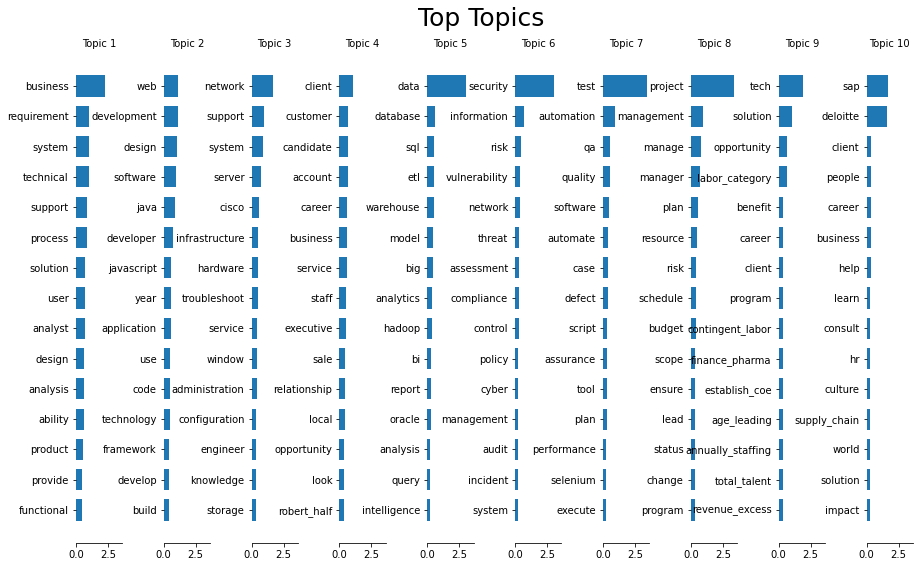

In [70]:
topic_word_plot()

In [71]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

In [72]:
def get_topics(W, feature_names, num_topics, num_words):
    topics = []
    for topic_idx, topic in enumerate(W):
        topic_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        topics.append(topic_words)
    return topics

## GENSIM LDA

In [73]:
import gensim

In [74]:
from gensim import corpora, models

In [75]:
dictionary = corpora.Dictionary(new_df['bigramtexts'])

In [76]:
dictionary.token2id

{'ab_initio': 0,
 'ability': 1,
 'able': 2,
 'accountability': 3,
 'adopt': 4,
 'advance': 5,
 'aid': 6,
 'analytical': 7,
 'analyze': 8,
 'application': 9,
 'aptitude': 10,
 'associate': 11,
 'assure': 12,
 'automated': 13,
 'automation': 14,
 'basis': 15,
 'batch': 16,
 'best': 17,
 'bourne': 18,
 'break': 19,
 'build': 20,
 'challenge': 21,
 'client': 22,
 'cobol': 23,
 'cod': 24,
 'collaborate': 25,
 'commerce': 26,
 'communication': 27,
 'competency': 28,
 'complex': 29,
 'comprehensive': 30,
 'compute': 31,
 'contribute': 32,
 'coordinate': 33,
 'create': 34,
 'critical': 35,
 'cut_edge': 36,
 'data': 37,
 'database': 38,
 'debug': 39,
 'design': 40,
 'desire': 41,
 'developer': 42,
 'development': 43,
 'dissect': 44,
 'eagerness': 45,
 'effort': 46,
 'engineer': 47,
 'engineering': 48,
 'ensure': 49,
 'environment': 50,
 'ethic': 51,
 'etl': 52,
 'excellent': 53,
 'execution': 54,
 'exist': 55,
 'expect': 56,
 'expert': 57,
 'flexible': 58,
 'follow': 59,
 'forefront': 60,
 'fra

In [77]:
corpus = [dictionary.doc2bow(word) for word in new_df['bigramtexts']]

In [78]:
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)

In [79]:
print(ldamodel.print_topics(num_topics=5,num_words=5))

[(3, '0.036*"business" + 0.020*"solution" + 0.018*"technology" + 0.017*"service" + 0.015*"client"'), (4, '0.030*"development" + 0.022*"design" + 0.020*"web" + 0.019*"software" + 0.018*"year"'), (5, '0.019*"client" + 0.017*"opportunity" + 0.010*"candidate" + 0.009*"apply" + 0.009*"service"'), (7, '0.100*"data" + 0.022*"database" + 0.020*"sql" + 0.019*"oracle" + 0.015*"business"'), (6, '0.110*"test" + 0.026*"sap" + 0.015*"business" + 0.013*"functional" + 0.013*"automation"')]


### PyLDAvis Visual

In [80]:
import pyLDAvis


In [81]:
import pyLDAvis.gensim_models

In [82]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(ldamodel,corpus,dictionary,mds='nmds',R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.101725  0.038187       1        1  20.231923
3      0.033115  0.121384       2        1  15.138485
4      0.095182 -0.042325       3        1  14.074816
2      0.096537 -0.051332       4        1  11.584923
9      0.031539  0.108277       5        1  10.356987
5     -0.199783  0.130844       6        1  10.158814
1      0.111330 -0.140543       7        1   6.024827
7      0.098065 -0.124050       8        1   5.872514
6     -0.012924  0.109016       9        1   4.005585
0     -0.354786 -0.149458      10        1   2.551125, topic_info=          Term          Freq         Total Category  logprob  loglift
164       test  25344.000000  25344.000000  Default  30.0000  30.0000
37        data  27456.000000  27456.000000  Default  29.0000  29.0000
261   security  15786.000000  15786.000000  Default  28.0000  28.0000
98     network  14643.000000  14643.000000  Default  27.0000  27.0000
283   business  37222.000000  37222.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
343   multiple    579.761203   7185.389761  Topic10  -5.0791   1.1514
121    program    581.443972  10756.026832  Topic10  -5.0762   0.7509
228    include    625.001851  24638.922026  Topic10  -5.0039  -0.0057
59      follow    528.033884   6502.929841  Topic10  -5.1725   1.1578
1719    update    507.851330   2790.297145  Topic10  -5.2115   1.9649

[806 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
7658      9  0.993461     abap
1         1  0.421178  ability
1         2  0.225786  ability
1         3  0.099199  ability
1         4  0.109553  ability
...     ...       ...      ...
185       6  0.087778     year
185       7  0.048518     year
185       8  0.096830     year
185       9  0.023487     year
185      10  0.030482     year

[2212 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 5, 3, 10, 6, 2, 8, 7, 1])

### Tuning - Coherence Model

In [83]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

In [84]:
print('\nPerplexity: ', ldamodel.log_perplexity(corpus,total_docs=10000))


Perplexity:  -7.9461692317465715


In [85]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda=CoherenceModel(model=ldamodel,texts=new_df['bigramtexts'],dictionary=dictionary,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print('\nCoherence Socre: ',coherence_lda)


Coherence Socre:  0.3969988660944452


In [86]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [87]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=new_df['bigramtexts'], start=30, limit=60, step=5)


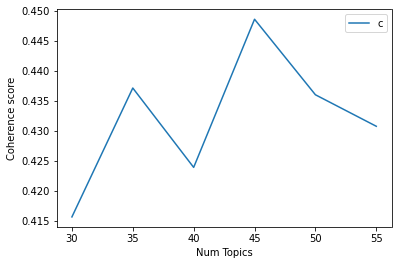

In [88]:
# Show graph
limit=60; start=30; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [89]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 30  has Coherence Value of 0.4156
Num Topics = 35  has Coherence Value of 0.4371
Num Topics = 40  has Coherence Value of 0.4239
Num Topics = 45  has Coherence Value of 0.4486
Num Topics = 50  has Coherence Value of 0.436
Num Topics = 55  has Coherence Value of 0.4308


In [90]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(2,
  '0.026*"apply" + 0.015*"look" + 0.014*"opportunity" + 0.012*"sex_national" + 0.012*"right" + 0.011*"regard_race" + 0.011*"authorize" + 0.011*"person" + 0.010*"verification" + 0.010*"color_religion"'),
 (3,
  '0.042*"cisco" + 0.027*"voice" + 0.023*"center" + 0.020*"network" + 0.019*"video" + 0.015*"communication" + 0.014*"telecommunication" + 0.012*"design" + 0.011*"system" + 0.010*"support"'),
 (35,
  '0.106*"oracle" + 0.093*"database" + 0.053*"sql" + 0.024*"server" + 0.017*"performance" + 0.016*"support" + 0.015*"year" + 0.013*"tune" + 0.013*"dba" + 0.010*"query"'),
 (18,
  '0.063*"ecommerce" + 0.028*"hybris" + 0.016*"commerce" + 0.015*"mortgage" + 0.015*"il" + 0.014*"merchandise" + 0.011*"atg" + 0.009*"osx" + 0.009*"apple" + 0.007*"support"'),
 (8,
  '0.023*"product" + 0.017*"software" + 0.012*"technology" + 0.012*"development" + 0.010*"new" + 0.010*"customer" + 0.009*"engineering" + 0.009*"technical" + 0.008*"design" + 0.008*"engineer"'),
 (11,
  '0.024*"skill" + 0.023*"abili

In [91]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(optimal_model,corpus,dictionary,mds='nmds',R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20    -0.159543 -0.010593       1        1  10.993370
8     -0.128831  0.033735       2        1   9.434161
40    -0.153669  0.099950       3        1   9.390998
6     -0.111161  0.136160       4        1   6.914005
23    -0.111746 -0.019798       5        1   6.130906
38    -0.132135 -0.094825       6        1   4.945220
29    -0.123664 -0.021163       7        1   4.399944
44    -0.124937 -0.039443       8        1   3.818866
41    -0.127190 -0.069382       9        1   3.691276
28    -0.118525 -0.067084      10        1   3.630708
10    -0.124326  0.075375      11        1   3.583114
12    -0.105895 -0.168138      12        1   3.295143
27    -0.064135  0.171317      13        1   2.837022
11    -0.117205  0.041816      14        1   2.821409
43    -0.096835 -0.034506      15        1   2.404302
14     0.005389  0.164672      16        1   2.023602
1     -0.099667  0.014998      17        1   1.974283
25    -0.057190 -0.008759      18        1   1.826000
15    -0.060605 -0.106630      19        1   1.405583
35    -0.036515 -0.143661      20        1   1.189659
0     -0.056650 -0.010691      21        1   1.129386
22     0.010729 -0.012353      22        1   1.049124
13    -0.010711  0.072186      23        1   0.962736
2      0.026513  0.067569      24        1   0.933027
33    -0.038435  0.055532      25        1   0.888617
9      0.017759 -0.060982      26        1   0.855625
37     0.046367  0.059354      27        1   0.763185
31     0.001149  0.063239      28        1   0.646483
19     0.022369 -0.003704      29        1   0.619911
26     0.011326  0.107916      30        1   0.618526
4      0.042007  0.079721      31        1   0.613532
16     0.035209 -0.232888      32        1   0.610206
3      0.013743 -0.059769      33        1   0.512180
21     0.008522 -0.001023      34        1   0.506032
7      0.008660  0.017247      35        1   0.492921
36     0.043134 -0.051011      36        1   0.451024
34     0.061453  0.068073      37        1   0.428318
39     0.122713  0.008128      38        1   0.323430
24     0.122293 -0.109491      39        1   0.213934
30     0.071633 -0.010568      40        1   0.186112
17     0.304502  0.091058      41        1   0.158466
18     0.203681 -0.021370      42        1   0.122552
42     0.278452 -0.060493      43        1   0.101620
5      0.282820  0.010245      44        1   0.071162
32     0.419148 -0.019964      45        1   0.032323, topic_info=           Term          Freq         Total Category  logprob  loglift
247     project  34904.000000  34904.000000  Default  30.0000  30.0000
164        test  23320.000000  23320.000000  Default  29.0000  29.0000
37         data  27085.000000  27085.000000  Default  28.0000  28.0000
40       design  28914.000000  28914.000000  Default  27.0000  27.0000
261    security  15644.000000  15644.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
293    customer      0.803164  16427.314848  Topic45  -7.2924  -1.8887
2040  clearance      0.408106    946.496826  Topic45  -7.9694   0.2882
232         job      0.426847  12050.886879  Topic45  -7.9245  -2.2111
185        year      0.435514  29712.984797  Topic45  -7.9044  -3.0934
147       skill      0.427394  28569.239629  Topic45  -7.9232  -3.0730

[3286 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
7658      14  0.004759       abap
7658      23  0.985049       abap
1          1  0.154356    ability
1          2  0.097766    ability
1          3  0.136160    ability
...      ...       ...        ...
2398       6  0.187364        zip
2398      18  0.074946        zip
2398      43  0.674510        zip
13977     19  0.951476  zookeeper
13977     43  0.030206  zookeeper

[24219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'P

## Gensim NMF Topic Modeling

In [92]:
from gensim import corpora, models, similarities

In [93]:
import gensim
from gensim import models, interfaces, utils
from gensim.models import Nmf

In [94]:
nmfmodel = gensim.models.nmf.Nmf(corpus, num_topics=10, id2word=dictionary)

In [95]:
print(nmfmodel.print_topics(num_topics=10,num_words=5))

[(0, '0.046*"solution" + 0.035*"client" + 0.017*"opportunity" + 0.015*"support" + 0.012*"include"'), (1, '0.042*"security" + 0.018*"system" + 0.017*"information" + 0.014*"support" + 0.014*"management"'), (2, '0.110*"data" + 0.012*"model" + 0.012*"business" + 0.011*"design" + 0.011*"database"'), (3, '0.056*"business" + 0.017*"management" + 0.017*"process" + 0.017*"project" + 0.016*"requirement"'), (4, '0.110*"project" + 0.023*"management" + 0.015*"manage" + 0.014*"manager" + 0.011*"plan"'), (5, '0.049*"system" + 0.029*"test" + 0.023*"support" + 0.016*"software" + 0.010*"service"'), (6, '0.080*"test" + 0.027*"project" + 0.025*"network" + 0.021*"management" + 0.016*"quality"'), (7, '0.048*"design" + 0.024*"development" + 0.018*"web" + 0.017*"technology" + 0.014*"year"'), (8, '0.031*"product" + 0.023*"software" + 0.020*"development" + 0.019*"customer" + 0.008*"new"'), (9, '0.027*"deloitte" + 0.023*"service" + 0.022*"client" + 0.017*"business" + 0.014*"help"')]


In [96]:
for topic_id, topic in nmfmodel.show_topics(formatted=False):
    print(f"Topic #{topic_id}: ", end='')
    print([(word, round(probability, 4)) for word, probability in topic])

Topic #0: [('solution', 0.0461), ('client', 0.0348), ('opportunity', 0.0167), ('support', 0.0155), ('include', 0.0123), ('tech', 0.0119), ('customer', 0.0094), ('skill', 0.0091), ('provide', 0.0089), ('technical', 0.0066)]
Topic #1: [('security', 0.0422), ('system', 0.0177), ('information', 0.0172), ('support', 0.0142), ('management', 0.0138), ('network', 0.0135), ('include', 0.0111), ('service', 0.0095), ('provide', 0.0079), ('technical', 0.0079)]
Topic #2: [('data', 0.1103), ('model', 0.012), ('business', 0.0116), ('design', 0.0111), ('database', 0.0106), ('sql', 0.0097), ('architecture', 0.0086), ('year', 0.0079), ('warehouse', 0.0078), ('technology', 0.0077)]
Topic #3: [('business', 0.0556), ('management', 0.0169), ('process', 0.0167), ('project', 0.0166), ('requirement', 0.016), ('skill', 0.0148), ('ability', 0.0135), ('technical', 0.0122), ('development', 0.0106), ('knowledge', 0.0071)]
Topic #4: [('project', 0.1102), ('management', 0.0231), ('manage', 0.0149), ('manager', 0.0138

### Visualization

In [117]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
from gensim import interfaces, utils, matutils

In [119]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(nmfmodel,corpus,dictionary)
vis

AttributeError: ignored

### Coherence Score Tuning

In [99]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_nmf=CoherenceModel(model=nmfmodel,texts=new_df['bigramtexts'],dictionary=dictionary,coherence='c_v')
coherence_nmf=coherence_model_nmf.get_coherence()
print('\nCoherence Socre: ',coherence_nmf)


Coherence Socre:  0.37508608358715784


In [109]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.nmf.Nmf(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [110]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=new_df['bigramtexts'], start=35, limit=70, step=3)


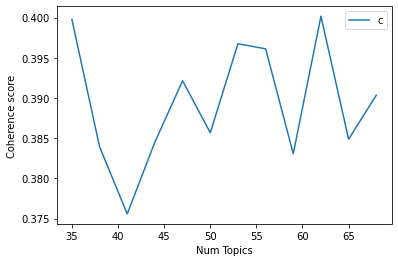

In [112]:
# Show graph
limit=70; start=35; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [113]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 35  has Coherence Value of 0.3998
Num Topics = 38  has Coherence Value of 0.3839
Num Topics = 41  has Coherence Value of 0.3756
Num Topics = 44  has Coherence Value of 0.3845
Num Topics = 47  has Coherence Value of 0.3921
Num Topics = 50  has Coherence Value of 0.3857
Num Topics = 53  has Coherence Value of 0.3967
Num Topics = 56  has Coherence Value of 0.3961
Num Topics = 59  has Coherence Value of 0.3831
Num Topics = 62  has Coherence Value of 0.4002
Num Topics = 65  has Coherence Value of 0.3849
Num Topics = 68  has Coherence Value of 0.3903


In [120]:
optimal_model = model_list[9]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(27,
  '0.050*"nbsp" + 0.027*"program" + 0.024*"analysis" + 0.015*"computer" + 0.014*"work" + 0.013*"city" + 0.013*"department" + 0.012*"user" + 0.008*"sql" + 0.008*"ability"'),
 (46,
  '0.047*"work" + 0.044*"environment" + 0.021*"use" + 0.017*"report" + 0.016*"change" + 0.011*"year" + 0.010*"tool" + 0.008*"qa" + 0.008*"learn" + 0.008*"able"'),
 (4,
  '0.016*"problem" + 0.016*"job" + 0.015*"help" + 0.012*"desk" + 0.011*"apply" + 0.010*"skill" + 0.010*"employee" + 0.009*"provide" + 0.008*"office" + 0.007*"perform"'),
 (18,
  '0.092*"knowledge" + 0.027*"strong" + 0.027*"skill" + 0.013*"application" + 0.012*"tool" + 0.010*"infrastructure" + 0.009*"windows" + 0.009*"linux" + 0.008*"understand" + 0.008*"communication"'),
 (10,
  '0.036*"program" + 0.030*"development" + 0.028*"mobile" + 0.025*"build" + 0.020*"new" + 0.012*"engineer" + 0.009*"android" + 0.008*"computer" + 0.008*"code" + 0.008*"platform"'),
 (7,
  '0.076*"data" + 0.072*"oracle" + 0.035*"integration" + 0.015*"sap" + 0.014*"tec

In [121]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(optimal_model,corpus,dictionary,mds='nmds',R=30)
vis

AttributeError: ignored

# NLTK LDA

In [122]:
lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=50)


In [123]:
for topic in lda.show_topics(num_topics=10, num_words=10):
    print(topic)

(0, '0.027*"project" + 0.022*"business" + 0.016*"management" + 0.012*"technical" + 0.011*"process" + 0.011*"system" + 0.010*"requirement" + 0.010*"ability" + 0.010*"skill" + 0.009*"support"')
(1, '0.025*"design" + 0.021*"status" + 0.018*"equal" + 0.014*"employer" + 0.012*"opportunity" + 0.012*"information" + 0.011*"regard_race" + 0.010*"user" + 0.010*"national_origin" + 0.010*"age"')
(2, '0.032*"client" + 0.020*"business" + 0.014*"service" + 0.010*"opportunity" + 0.010*"solution" + 0.010*"sap" + 0.009*"consultant" + 0.009*"sale" + 0.009*"technology" + 0.008*"job"')
(3, '0.062*"tech" + 0.047*"solution" + 0.030*"opportunity" + 0.016*"client" + 0.013*"benefit" + 0.012*"multiple" + 0.012*"career" + 0.012*"program" + 0.011*"labor_category" + 0.010*"include"')
(4, '0.017*"product" + 0.013*"technology" + 0.011*"software" + 0.010*"customer" + 0.010*"new" + 0.009*"opportunity" + 0.008*"build" + 0.008*"engineer" + 0.007*"look" + 0.007*"engineering"')
(5, '0.091*"security" + 0.024*"information" +

In [124]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.160531 -0.040385       1        1  30.120415
9     -0.137362  0.066254       2        1  15.998295
6     -0.134025  0.001849       3        1  14.529562
4     -0.079747 -0.118085       4        1  13.384266
2     -0.043802 -0.206238       5        1  11.081957
7     -0.094814  0.101578       6        1   5.534022
5     -0.064455  0.089348       7        1   4.264446
1      0.227938 -0.067634       8        1   2.855692
8      0.165589  0.259917       9        1   1.519746
3      0.321208 -0.086605      10        1   0.711600, topic_info=            Term          Freq         Total Category  logprob  loglift
37          data  27634.000000  27634.000000  Default  30.0000  30.0000
261     security  15537.000000  15537.000000  Default  29.0000  29.0000
151     solution  22647.000000  22647.000000  Default  28.0000  28.0000
164         test  23780.000000  23780.000000  Default  27.0000  27.0000
40        design  28542.000000  28542.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
86         learn    163.619129   4751.400607  Topic10  -5.0674   1.5768
214     employer    162.191188   3224.758411  Topic10  -5.0761   1.9556
961         know    160.485112   2617.914647  Topic10  -5.0867   2.1535
1099  consultant    161.230236   4586.579567  Topic10  -5.0821   1.5974
487        offer    160.882513   4229.836077  Topic10  -5.0843   1.6762

[785 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
7658      5  0.995184     abap
1         1  0.603822  ability
1         2  0.100848  ability
1         3  0.140196  ability
1         4  0.076601  ability
...     ...       ...      ...
185       5  0.094935     year
185       6  0.089629     year
185       7  0.026844     year
185       8  0.010028     year
185       9  0.007236     year

[1864 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 7, 5, 3, 8, 6, 2, 9, 4])

In [125]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_nltklda=CoherenceModel(model=lda,texts=new_df['bigramtexts'],dictionary=dictionary,coherence='c_v')
coherence_nltklda=coherence_model_nltklda.get_coherence()
print('\nCoherence Socre: ',coherence_nltklda)


Coherence Socre:  0.45431231886313983


In [132]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=40, step=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [133]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=new_df['bigramtexts'], start=40, limit=60, step=5)


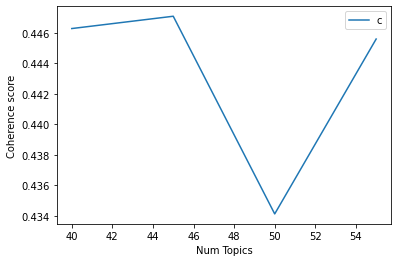

In [134]:
# Show graph
limit=60; start=40; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [135]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 40  has Coherence Value of 0.4463
Num Topics = 45  has Coherence Value of 0.4471
Num Topics = 50  has Coherence Value of 0.4341
Num Topics = 55  has Coherence Value of 0.4456


In [137]:
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(9,
  '0.118*"data" + 0.030*"sql" + 0.026*"database" + 0.016*"etl" + 0.016*"business" + 0.016*"report" + 0.015*"warehouse" + 0.012*"bi" + 0.012*"year" + 0.010*"server"'),
 (19,
  '0.047*"embed" + 0.037*"electrical" + 0.033*"device" + 0.024*"mechanical" + 0.024*"circuit" + 0.023*"design" + 0.019*"board" + 0.018*"assembly" + 0.015*"electronics" + 0.015*"lab"'),
 (37,
  '0.098*"oracle" + 0.024*"system" + 0.020*"skill" + 0.016*"year" + 0.014*"unix" + 0.012*"support" + 0.011*"ibm" + 0.011*"knowledge" + 0.011*"script" + 0.010*"strong"'),
 (13,
  '0.020*"cloud" + 0.014*"technology" + 0.012*"opportunity" + 0.008*"look" + 0.008*"make" + 0.008*"build" + 0.008*"engineer" + 0.007*"new" + 0.007*"service" + 0.007*"people"'),
 (8,
  '0.035*"system" + 0.025*"server" + 0.021*"infrastructure" + 0.017*"linux" + 0.016*"storage" + 0.015*"performance" + 0.013*"environment" + 0.013*"network" + 0.012*"knowledge" + 0.011*"year"'),
 (25,
  '0.062*"network" + 0.014*"cisco" + 0.011*"system" + 0.010*"data" + 0.00